# Compute performance metrics for the given Y and Y_score without sklearn

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [42]:
# write your code here
#Reading the csv file
data=pd.read_csv("5_a.csv")
data

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
...,...,...
10095,1.0,0.665371
10096,1.0,0.607961
10097,1.0,0.777724
10098,1.0,0.846036


In [43]:
# Count of positive and negative points
positive_points=0
negative_points=0

for i in range(0,len(data)):
    if data['y'].loc[i] == 1:
        positive_points+=1
    if data['y'].loc[i] == 0:
        negative_points+=1
    
print('positive points:',positive_points)
print('negative points:',negative_points)

positive points: 10000
negative points: 100


In [44]:
#Creating y_pred from the given class label
data['Ypred']=data['proba'].map(lambda x:0 if x<0.5 else 1)
data

,y,proba,Ypred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1
...,...,...,...
10095,1.0,0.665371,1
10096,1.0,0.607961,1
10097,1.0,0.777724,1
10098,1.0,0.846036,1


In [48]:
# Creating the confusion matrix
confusion_matrix=[]
#Calculating True positive,False positive,True negative,False negative
T_P=((data.y==1)&(data.Ypred==1))
TP=sum(T_P)
F_N=((data.y==1)&(data.Ypred==0))
FN=sum(F_N)
F_P=((data.y==0)&(data.Ypred==1))
FP=sum(F_P)
T_N=((data.y==0)&(data.Ypred==0))
TN=sum(T_N)


confusion_matrix.append(TP)
confusion_matrix.append(FN)
confusion_matrix.append(FP)
confusion_matrix.append(TN)

print('Confusion Matrix:',np.asarray(confusion_matrix))



Confusion Matrix: [10000     0   100     0]


In [47]:
#Calculating precision,recall,F1score
precision=TP/(TP+FP)
recall=TP/(FN+TP)
F1_score=(2*precision*recall)/(precision+recall)
print("F1 Score:",F1_score)

F1 Score: 0.9950248756218906


In [49]:
#calculating the accuracy
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)

Accuracy: 0.9900990099009901


In [51]:
# Computing AUC score
data=data.sort_values(by=['proba'],ascending=False)
proba_score=data.values[:,1]
y=data.values[:,0]
plotting_data=[]
for threshold in proba_score:
    threshold_y_pred=np.where(proba_score>=threshold,1,0)
    TP=((y==1)&(threshold_y_pred==1)).sum()
    FN=((y==1)&(threshold_y_pred==0)).sum()
    FP=((y==0)&(threshold_y_pred==1)).sum()
    TN=((y==0)&(threshold_y_pred==0)).sum()
    TPR=TP/(TP+FN)
    FPR=FP/(FP+TN)
    plotting_data.append([TPR,FPR])
    
tpr_array=np.array([i for i,_ in plotting_data])
fpr_array=np.array([i for _,i in plotting_data])
AUC=np.trapz(tpr_array,fpr_array)
print('AUC score:',AUC)

AUC score: 0.48829900000000004


<AxesSubplot:xlabel='FPR', ylabel='TPR'>

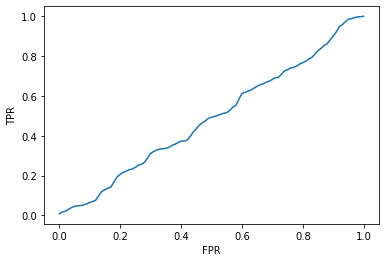

In [13]:
#Plot of TPR vs FPR to represent the AUC score
df=pd.DataFrame(data=plotting_data,columns=['TPR','FPR'])
sns.lineplot(data = df,x='FPR',y='TPR')

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [52]:
# write your code
#Reading the csv file
data1=pd.read_csv("5_b.csv")
data1

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648
...,...,...
10095,0.0,0.474401
10096,0.0,0.128403
10097,0.0,0.499331
10098,0.0,0.157616


In [53]:
# Count of positive and negative points
positive_points=0
negative_points=0

for i in range(0,len(data1)):
    if data1['y'].loc[i]==1:
        positive_points+=1
    if data1['y'].loc[i]==0:
        negative_points+=1
print('Positive data points:',positive_points)
print('Negative data points:',negative_points)

Positive data points: 100
Negative data points: 10000


In [54]:
#Creating y_pred from the given class label
data1['y_pred']=data1['proba'].map(lambda x:0 if x<0.5 else 1)
data1

,y,proba,y_pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0
...,...,...,...
10095,0.0,0.474401,0
10096,0.0,0.128403,0
10097,0.0,0.499331,0
10098,0.0,0.157616,0


In [55]:
# Creating the confusion matrix
confusion_matrix=[]
#Calculating True positive,False positive,True negative,False negative
T_P=((data1['y']==1)&(data1['y_pred']==1))
TP=sum(T_P)
F_N=((data1['y']==1)&(data1['y_pred']==0))
FN=sum(F_N)
F_P=((data1['y']==0)&(data1['y_pred']==1))
FP=sum(F_P)
T_N=((data1['y']==0)&(data1['y_pred']==0))
TN=sum(T_N)

confusion_matrix.append(TP)
confusion_matrix.append(FN)
confusion_matrix.append(FP)
confusion_matrix.append(TN)

print('Confusion Matrix:',np.asarray(confusion_matrix))

Confusion Matrix: [  55   45  239 9761]


In [56]:
#Calculating precision,recall,F1score
precision=TP/(TP+FP)
recall=TP/(FN+TP)
F1_score=(2*precision*recall)/(precision+recall)
print("F1 Score:",F1_score)

F1 Score: 0.2791878172588833


In [57]:
#calculating the accuracy
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)

Accuracy: 0.9718811881188119


In [58]:
# Computing AUC score
data1=data1.sort_values(by=['proba'],ascending=False)
proba_score=data1.values[:,1]
y=data1.values[:,0]
plotting_data=[]
for threshold in proba_score:
    threshold_y_pred=np.where(proba_score>=threshold,1,0)
    TP=((y==1)&(threshold_y_pred==1)).sum()
    FP=((y==0)&(threshold_y_pred==1)).sum()
    FN=((y==1)&(threshold_y_pred==0)).sum()
    TN=((y==0)&(threshold_y_pred==0)).sum()
    TPR=(TP)/(TP+FN)
    FPR=(FP)/(FP+TN)
    plotting_data.append([TPR,FPR])

tpr_array=np.array([i for i,_ in plotting_data])
fpr_array=np.array([i for _,i in plotting_data])    
AUC=np.trapz(tpr_array,fpr_array)
print('AUC score:',AUC)

AUC score: 0.9377570000000001


<AxesSubplot:xlabel='FPR', ylabel='TPR'>

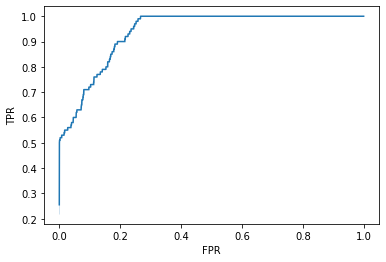

In [59]:
# Plot of TPR vs FPR to represent the AUC score
df1=pd.DataFrame(data=plotting_data,columns=['TPR','FPR'])
sns.lineplot(data=df1,x='FPR',y='TPR')

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [15]:
 # write your code
data2=pd.read_csv('5_c.csv')
data2

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
...,...,...
2847,1,0.491663
2848,1,0.292109
2849,1,0.659161
2850,1,0.456265


In [17]:
#Creating y_pred from the given class label
data2['ypred']=data2['prob'].map(lambda x:0 if x<0.5 else 1)
data2

,y,prob,ypred
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0
...,...,...,...
2847,1,0.491663,0
2848,1,0.292109,0
2849,1,0.659161,1
2850,1,0.456265,0


In [74]:
#Sorting the data in descending order
data2=data2.sort_values(by='prob',ascending=False)
y=data2.values[:,0]
prob_score=data2.values[:,1]
A_metric=[]
for threshold in prob_score:
    threshold_y_pred=np.where(prob_score>threshold,1,0)
    FN=((y==1)&(threshold_y_pred==0)).sum()
    FP=((y==0)&(threshold_y_pred==1)).sum()
    A=(500*FN)+(100*FP)
    A_metric.append(A)

print('Minimum value which gives the best threshold is:',min(A_metric))

Minimum value which gives the best threshold is: 141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [23]:
data3=pd.read_csv("5_d.csv")
data3

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
...,...,...
157195,87.0,83.0
157196,97.0,86.0
157197,106.0,93.0
157198,105.0,101.0


In [75]:
#Calculating the Mean Squared Error
y=data3.values[:,0]
y_pred=data3.values[:,1]
n=len(data3)

MSE=np.sum((y-y_pred)**2)/n
print("Mean Squared Error :",MSE)

Mean Squared Error : 177.16569974554707


In [76]:
#Calculating Mean Absolute Percentage Error
MAPE=np.sum(np.absolute(y-y_pred))/np.sum(y)
print("Mean Absolute Percentage Error :",MAPE)

Mean Absolute Percentage Error : 0.1291202994009687


In [77]:
#Calculating coefficient of determination
y_mean=np.sum(y)/n

sum_of_squares_residuals=np.sum((y-y_pred)**2)

total_sum_of_squares=np.sum((y-y1)**2)

coeff_of_determination=1-(sum_of_squares_residuals/total_sum_of_squares)
print("coefficient of determination :",coeff_of_determination)

coefficient of determination : 0.9563582786990937
